# Google Trends Machine Learning
Goal:
   - Accept a user keyword for a trend they want to predict
   - Take that keyword and pull time series data from google trends
   - Run exploratory analysis on the time series data; check for trend, seasonality
   - Create a forecast on the data so the user can make an estimated guess where market demand for the keyword, or product, will go

In [1]:
# Package Imports
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.style as style
from pytrends.request import TrendReq
style.use('ggplot')

## Part 1: Data Import
Goal:
- Have the user define a keyword they want to study
- Make the call to google trends api and pull time series data for the last 5 years on that keyword
- Save the resultant data to a pandas dataframe for analysis

In [2]:
# Setting up the trends API call; language english (en-US) and time 360 (US time zone)
pytrends = TrendReq(hl = 'en-US', tz = 360)

# Setting up the keyword --> * EDIT THIS *
kw = ['Alternative Investments']

# Grabbing the p12 months date range
endDate = datetime.date.today() - datetime.timedelta(1)
startDate = endDate - datetime.timedelta(365*5)
dateRange = str(startDate) + ' ' + str(endDate)

# Grabbing the data from api
pytrends.build_payload(kw_list= kw,
                       timeframe = dateRange,
                       geo = 'US'
                      )

# Saving the time series data
data = pytrends.interest_over_time()

# Checking results
data.head()

,Alternative Investments,isPartial
date,,
2017-04-02,63,False
2017-04-09,49,False
2017-04-16,50,False
2017-04-23,72,False
2017-04-30,43,False


## Part 2: Exploratory Analysis
Goal:
- Visualze interest in alternative investments over time
- Check data for trend, seasonality, stationary
- Highlight anything that might impact modeling

In [3]:
# Checking dataframe information
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2017-04-02 to 2022-03-27
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Alternative Investments  261 non-null    int32
 1   isPartial                261 non-null    bool 
dtypes: bool(1), int32(1)
memory usage: 3.3 KB


In [4]:
# Describing the dataframe
data.describe()

,Alternative Investments
count,261.000000
mean,52.590038
std,13.683108
min,20.000000
25%,42.000000
50%,52.000000
75%,62.000000
max,100.000000


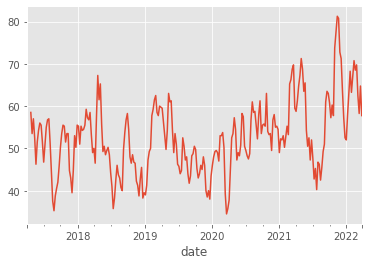

In [5]:
# Plotting monthly moving average of interest over time
data['Alternative Investments'].rolling(4).mean().plot()

In [6]:
!jupyter nbconvert --to script google-trends-machine-learning.ipynb

[NbConvertApp] Converting notebook google-trends-machine-learning.ipynb to script
[NbConvertApp] Writing 2199 bytes to google-trends-machine-learning.py
